# 1. Import the required libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense



# 2. Data Acquisition





Instead of reading from local, we are reading data directly from github



In [34]:

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, usecols=[1])  # Only load the 'Passengers' column
data = data.values  # Convert to a numpy array
data = data.astype('float32')  # Ensure data is in float32 format

Reading images directly from github folder

# 3. Data Preparation

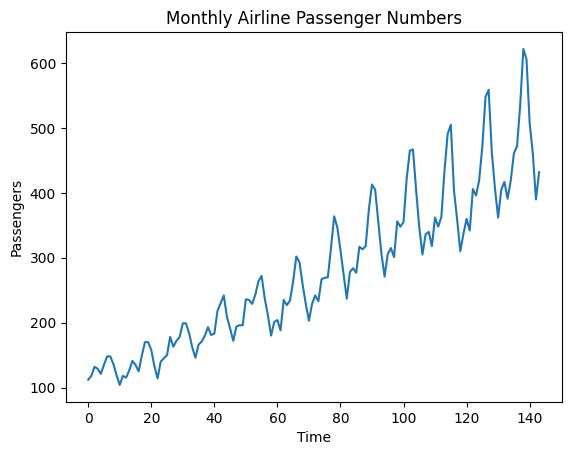

In [36]:
# Plot the dataset
plt.plot(data)
plt.title("Monthly Airline Passenger Numbers")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()


In [38]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [39]:
# Create sequences for the GRU
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 12  # Using past 12 months to predict the next month
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape the data for the GRU (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


## 4. Deep Neural Network Architecture


In [41]:


# Build the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



# 5. Training the model


In [42]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0978 - val_loss: 0.3192
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0769 - val_loss: 0.2736
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0619 - val_loss: 0.2312
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0485 - val_loss: 0.1927
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0385 - val_loss: 0.1575
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0340 - val_loss: 0.1259
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227 - val_loss: 0.0984
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0187 - val_loss: 0.0743
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - val_loss: 0.0563
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - val_loss: 0.0450
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - val_loss: 0.0381
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0078 - val_loss: 0.0350


# 6. Test the model


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


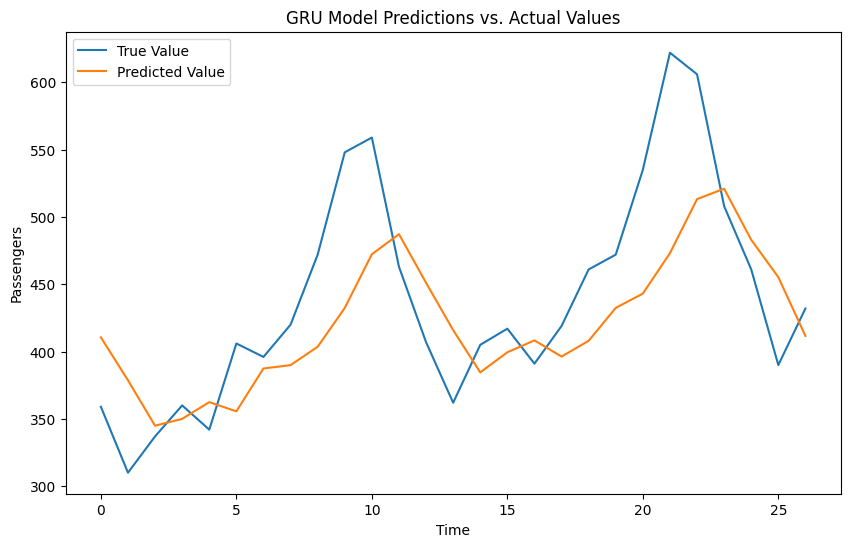

In [43]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('GRU Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()




# 7. Report the result




In [44]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 3442.277099609375
Root Mean Squared Error: 58.670921325683594
Mean Absolute Error: 46.86445617675781
